In [1]:
import sys; sys.path.append('../../src/sde_hjb_solver')

import numpy as np

from hjb_solver_2d_st import SolverHJB2D
from controlled_sde_2d import DoubleWellMGF2D
from base_parser import get_base_parser

In [2]:
# initialize controlled sde object
sde = DoubleWellMGF2D(
    beta=2,
    alpha=np.array([1., 2.]),
    domain=np.full((2, 2), [-2, 2]),
    ts_pot_level=0.25,
    #target_set=np.full((2, 2), [-0.5, 0.5]),
    #target_set=np.array([[1, 2], [-0.5, 0.5]]),
)

# initialize hjb solver object
sol_hjb = SolverHJB2D(sde, h=1e-1)

In [3]:
# compute hjb solution 
sol_hjb.solve_bvp()
sol_hjb.compute_value_function()
sol_hjb.compute_optimal_control()

# compute mean first hitting time
sol_hjb.mfht = sde.compute_mfht()

# save
sol_hjb.save()

In [4]:
# report
#sol_hjb.write_report(x=-1)

In [5]:
# evaluate in grid
sol_hjb.get_perturbed_potential_and_drift()

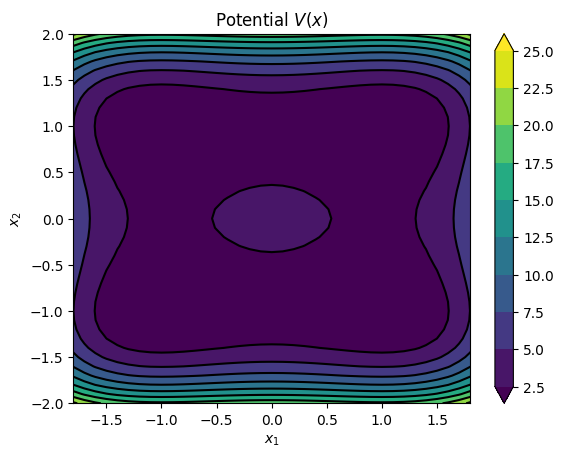

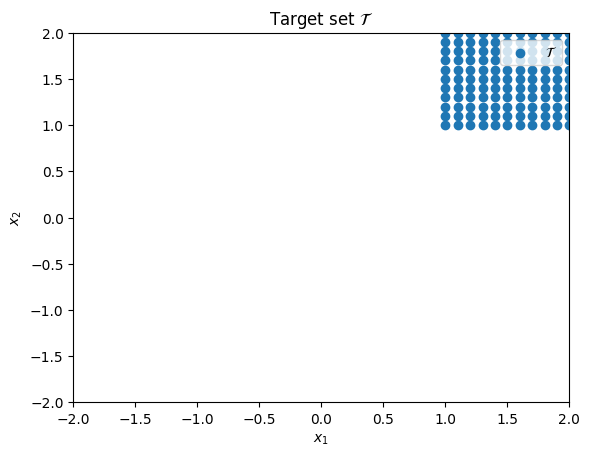

In [6]:
# plot potential
xlim = -1.8, 1.8
ylim = -1.8, 1.8
sde.plot_2d_potential(xlim=xlim, ylim=ylim)

# plot target sets
sde.plot_target_set()

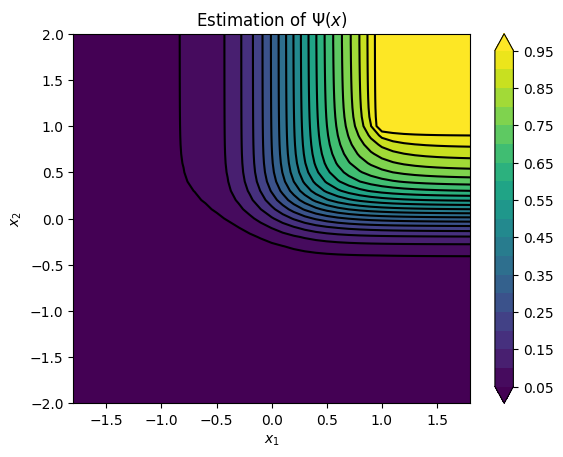

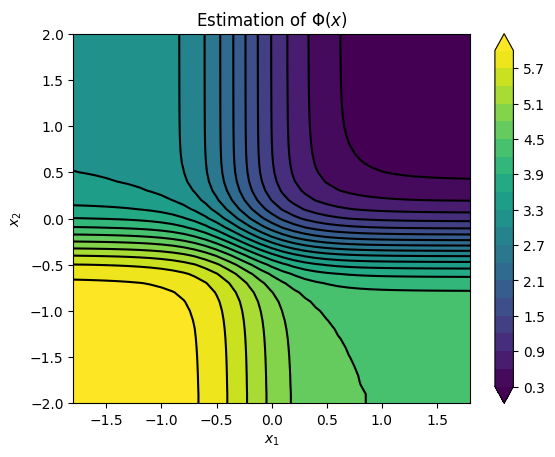

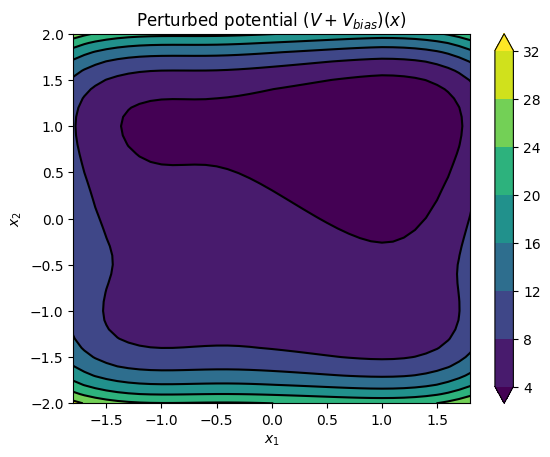

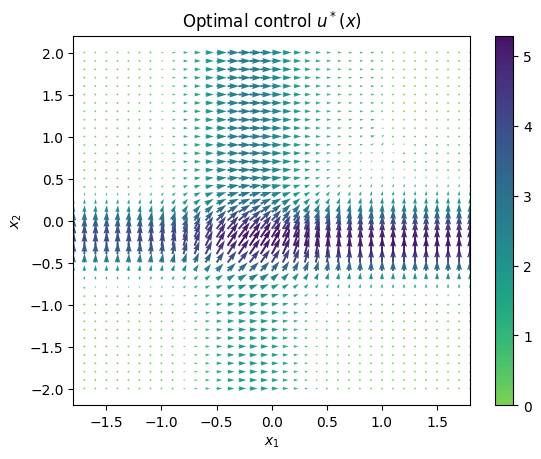

In [7]:
# plots
sol_hjb.plot_2d_psi(levels=20, xlim=xlim, ylim=ylim)
sol_hjb.plot_2d_value_function(levels=20, xlim=xlim, ylim=ylim)
sol_hjb.plot_2d_perturbed_potential(levels=10, xlim=xlim, ylim=ylim)
sol_hjb.plot_2d_control(scale=None, width=0.005, xlim=xlim, ylim=ylim)
#sol_hjb.plot_1d_perturbed_drift()

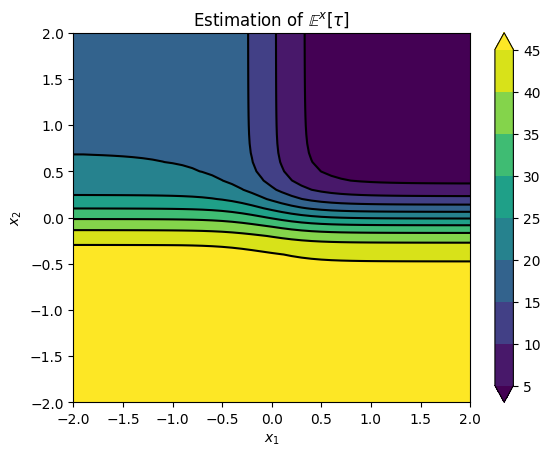

In [8]:
# estimate mean first hitting time
sol_hjb.plot_2d_mfht()